# How can we build a machine learning model in Python that accurately predicts real estate property prices using features like size, location, number of bedrooms/bathrooms, and historical sales data? 

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Step 2: Load Data
df = pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S3\Reression\Real_Estate.csv")

In [5]:
# Step 3: Drop Unnecessary Columns
df = df.drop(columns=["Transaction date"], errors='ignore')  # date isn't needed

In [7]:
# Step 4: Check for Missing Values
df = df.dropna()

In [9]:
# Step 5: Feature-Target Split
X = df.drop("House price of unit area", axis=1)
y = df["House price of unit area"]

In [11]:
# Step 6: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Step 8: Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name}:\n  RMSE = {rmse:.2f}\n  R² = {r2:.3f}\n")

C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression:
  RMSE = 11.16
  R² = 0.550

Ridge Regression:
  RMSE = 11.17
  R² = 0.549



C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest:
  RMSE = 11.55
  R² = 0.517

XGBoost:
  RMSE = 12.36
  R² = 0.447



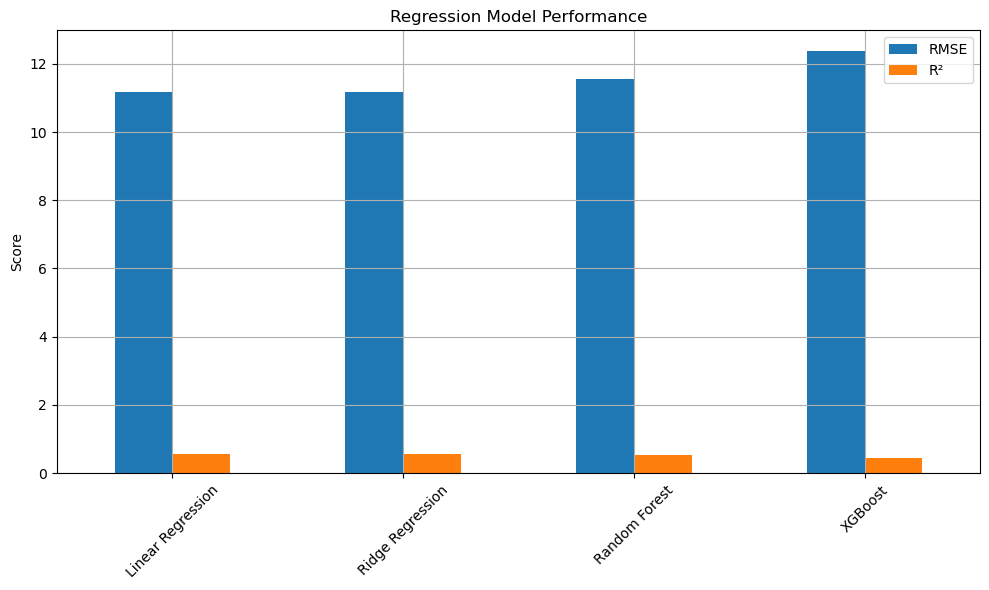

In [17]:
# Step 9: Visualize Results
results_df = pd.DataFrame(results).T
results_df.plot(kind="bar", figsize=(10, 6), title="Regression Model Performance")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()